In [ ]:
!pip install -qU datasets transformers evaluate accelerate

# Image Segmentation

**Image segmentation** models separate areas corresponding to different areas of interest in an image by assigning a label to each pixel.

Segmentation task includes:
* semantic segmentation
* instance segmentation
* panoptic segmentation



## Types of segmentation

**Semantic segmentation** assigns a label or class to every single pixel in an image. It will assign the same class to every pixel of an object it comes across in an image.

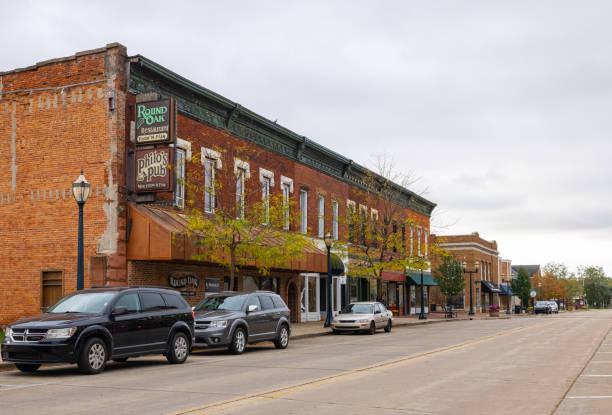

In [5]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
# check the example image
image

In [6]:
image.size

(612, 415)

We will load the SegFormer to do this semantic segmentation:

In [7]:
semantic_segmentation = pipeline(
    'image-segmentation',
    'nvidia/segformer-b1-finetuned-cityscapes-1024-1024'
)

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [8]:
results = semantic_segmentation(image)
results

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

The `results` includes a mask for every predicted class. We can take a look at the mask for the car class:

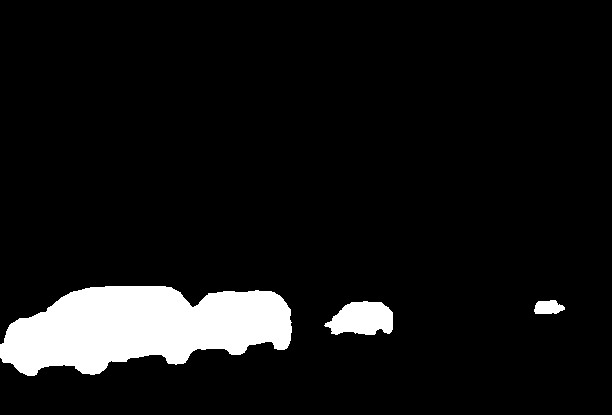

In [9]:
results[-1]['mask']

**Instance segmentation** does not classify every pixel but predict a mask for **every instance of an object** in a given image. It works similar to object detection, where there is a bounding box for every instance, there's a segmentation mask instead.

We will use `facebook/mask2former-swin-large-cityscapes-instance`

In [10]:
instance_segmentation = pipeline(
    'image-segmentation',
    'facebook/mask2former-swin-large-cityscapes-instance'
)

config.json:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Device set to use cpu


In [11]:
results = instance_segmentation(image)
results

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999945,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999652,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.903529,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

There are multiple cars classified now.

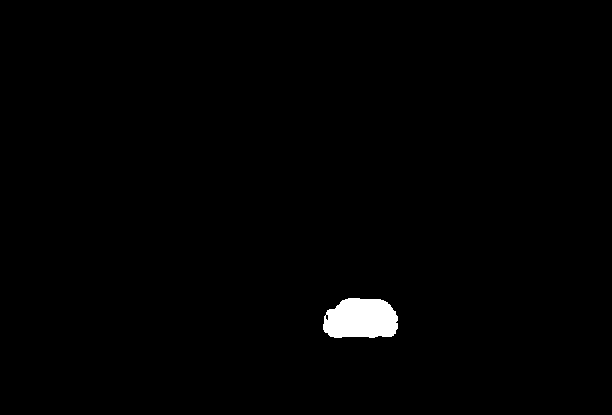

In [12]:
results[2]['mask']

**Panoptic segmentation** combines semantic segmentation and instance segmentation, where every pixel is classified into a class and an instance of that class, and there are multiple masks for each instance of a class.

We can use `facebook/mask2former-swin-large-cityscapes-panoptic`:

In [13]:
panoptic_segmentation = pipeline(
    'image-segmentation',
    'facebook/mask2former-swin-large-cityscapes-panoptic'
)

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Device set to use cpu


In [14]:
results = panoptic_segmentation(image)
results

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99997,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999575,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999634,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.996092,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999221,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99987,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

Now we have more classes.

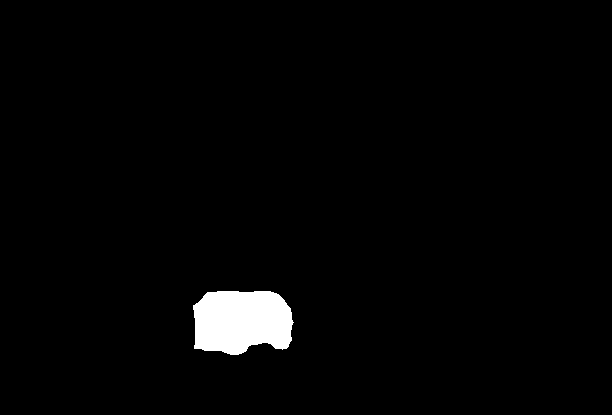

In [15]:
results[1]['mask']

## Fine-tuning a model for segmentation

We will finetune `SegFormer` on the **SceneParse150** dataset.

### Load SceneParse150 dataset

In [16]:
from datasets import load_dataset

ds = load_dataset(
    'scene_parse_150',
    split='train[:50]'
)

ds = ds.train_test_split(test_size=0.2)
train_ds = ds['train']
test_ds = ds['test']
ds

README.md:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

scene_parse_150.py:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 40
    })
    test: Dataset({
        features: ['image', 'annotation', 'scene_category'],
        num_rows: 10
    })
})

In [17]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=640x480>,
 'scene_category': 558}

* `image` is a PIL image of the scene
* `annotation` is a PIL image of segmentation map, which is also the model's target
* `scene_category` is a category id that describes the image scene like "kitchen" or "office". We do not need this for the segmentation task.

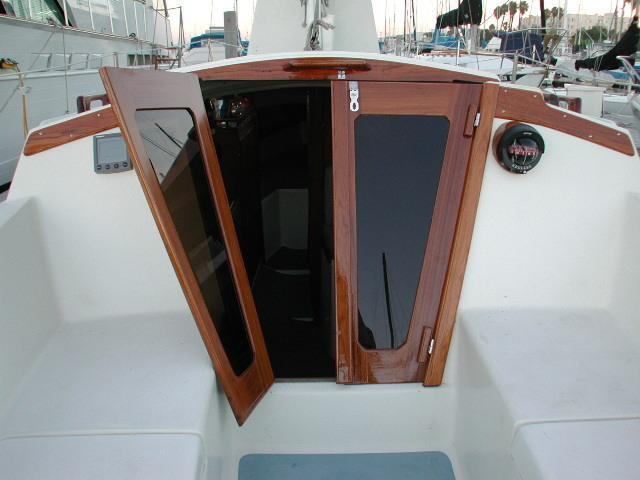

In [18]:
# check the image
train_ds[0]['image']

We also need to create a dictionary that maps a label id to a label class which will be useful when we set up the model later.

In [19]:
import json
from pathlib import Path
from huggingface_hub import hf_hub_download

repo_id = 'huggingface/label-files'
filename = 'ade20k-id2label.json'

id2label = json.loads(Path(hf_hub_download(repo_id, filename, repo_type='dataset')).read_text())

id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)
num_labels

ade20k-id2label.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

150

#### Custom dataset

We can create and use our own dataset if we prefer to train with the [`run_semantic_segmentation.py`](https://github.com/huggingface/transformers/blob/main/examples/pytorch/semantic-segmentation/run_semantic_segmentation.py) script instead of a notebook instance.

To start with, we need

1. a `DatasetDict` with two `Image` columns, "image" and "label"

```python
from datasets import Dataset, DatasetDict, Image

image_paths_train = ["path/to/image_1.jpg/jpg", "path/to/image_2.jpg/jpg", ..., "path/to/image_n.jpg/jpg"]
label_paths_train = ["path/to/annotation_1.png", "path/to/annotation_2.png", ..., "path/to/annotation_n.png"]

image_paths_validation = [...]
label_paths_validation = [...]

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict(
        {'image_path': sorted(image_paths),
        'label_path': sorted(label_paths)}
    )
    dataset = dataset.cast_column('image', Image())
    dataset = dataset.cast_column('label', Image())
    return dataset


# Step 1: create Dataset objects
train_dataset = create_dataset(image_paths_train, label_paths_train)
val_dataset = create_dataset(image_paths_val, label_paths_val)

# Step 2: create DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'val': val_dataset,
})

# Step 3: push to hub
dataset.push_to_hub('username/dataset-repo')
```

2. a `id2label` dictionary mapping the class integers to their class names

```python
import json

id2label = {0: 'cat', 1: 'dog'}
with open('id2label.json', 'w') as fp:
    json.dump(id2label, fp)
```

### Preprocess

We will load a SegFormer image processor to prepare the images and annotations for the model.

Make sure to check the label index. For the SceneParse150 dataset, the background class is 0 (zero-index). However, the background class is not actually included in the 150 classes, so we will need to set `do_reduce_labels=True` to subtract one from all the labels. The zero-index is replaced by `255` so the background class is ignored by SegFormer's loss function:

In [45]:
from transformers import AutoImageProcessor

checkpoint = 'nvidia/mit-b0'
image_processor = AutoImageProcessor.from_pretrained(
    checkpoint,
    do_reduce_labels=True
)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

We also apply some data augmentations to image datasets to make a model more robust against overfitting. Here we add a `ColorJitter` from `torchvision` to randomly change the color properties of an image.

In [46]:
from torchvision.transforms import ColorJitter

jitter = ColorJitter(
    brightness=0.25,
    contrast=0.25,
    saturation=0.25,
    hue=0.1
)

We need two preprocessing functions to prepare the images and annotations for the model, which convert the images into `pixel_values` and annotations to `labels`.
* For training set, `jitter` is applied before providing the images to the image processor.
* For test set, the image processor crops and normalizes the `images`, and only crops the `labels` because no data augmentation should be applied during testing.

In [47]:
def train_transforms(example_batch):
    images = [jitter(x) for x in example_batch['image']]
    labels = [x for x in example_batch['annotation']]

    inputs = image_processor(images, labels)
    return inputs

def val_transforms(example_batch):
    images = [x for x in example_batch['image']]
    labels = [x for x in example_batch['annotation']]

    inputs = image_processor(images, labels)
    return inputs

To apply the transformations and augmentations, we use the `set_transform` function to apply them over the entire datasets.

In [48]:
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

### Evaluate

For the segmentation task, we need to load the **mean Intersection over Union (mIoU)** metric.

In [49]:
import evaluate

metric = evaluate.load('mean_iou')

In [50]:
import numpy as np
import torch
from torch import nn

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred

        logits_tensor = torch.from_numpy(logits)
        logits_tensor = nn.functional.interpolate(
            logits_tensor,
            size=labels.shape[-2:],
            mode='bilinear',
            align_corners=False
        ).argmax(dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()
        metrics = metric.compute(
            predictions=pred_labels,
            reference=labels,
            num_labels=num_labels,
            ignore_index=255,
            reduce_labels=False
        )

        for key, val in metrics.items():
            if isinstance(val, np.ndarray):
                metrics[key] = value.tolist()

        return metrics

### Train

We start training by loading SegFormer with `AutoModelForSemanticSegmentation`

In [51]:
from transformers import AutoModelForSemanticSegmentation, TrainingArguments, Trainer

model = AutoModelForSemanticSegmentation.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id
)

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Note that here we do not remove unused columns because this will drop the `image` column. Without the `image` column, we cannot create `pixel_values`

In [52]:
training_args = TrainingArguments(
    output_dir='segformer-b0-scene-parse-150',
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    eval_strategy='steps',
    save_strategy='steps',
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False, # NOTE here
    push_to_hub=False,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

### Inference

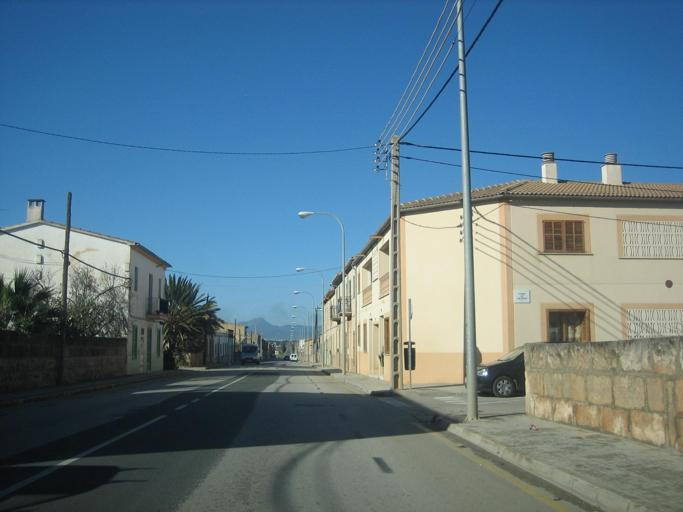

In [53]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")
ds = ds.train_test_split(test_size=0.2)
test_ds = ds["test"]
image = ds["test"][0]["image"]
image

We will do inference without a pipeline

In [ ]:
from accelerate.test_utils.testing import get_backend

device, _, _ = get_backend()
encoding = image_processor(image, return_tensors='pt')
pixel_values = encoding.pixel_values.to(device)

In [ ]:
outputs = model(pixel_values)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode='bilinear',
    align_corners=False
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

To visualize the results, we need to load the dataset color palette as `ade_palette()` that maps each class to their RGB values.

In [ ]:
def ade_palette():
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])

Now we can combine and plot our image and the predicted segmentation map:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()